2D surface fields of annual mean temperature, salinity, DIN, Chl-a(Region 
0-10 S,35 -50 E) for 2005. For Chl-a, two types of figures: using linear and log scale of chlorophyll. Make sure that Chl-a is labelled in mg/m^3 on the colour bar on log plot. For each variable, it was calculated the area-averaged value taking into account that the grid is irregular.

In [1]:
#import modules 
#allows plots to appear beneath cell
%matplotlib notebook 
import numpy as np
import pandas as pd
import numpy.ma as ma
import netCDF4 as nc4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
from matplotlib import colors, ticker, cm
import matplotlib.patches as mpatches
import cartopy as cart
from mpl_toolkits.basemap import Basemap
import xarray as xrr
from numpy.ma import masked_where

In [3]:
#load in monthly SST and SSS data from 2005:
m_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
sst=np.zeros((120,180,12))
sss=np.zeros((120,180,12))
va=0
for m in m_list:
    fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/means/2005/ORCA0083-N06_2005m'+str(m)+'T.nc','r',format='NETCDF4')
    sst_=fyd.variables['sst'][0,1373:1493,3865:4045]
    sst[:,:,va]=sst_
    sss_=fyd.variables['sss'][0,1373:1493,3865:4045]
    sss[:,:,va]=sss_
    va=va+1
    
sst[np.abs(sst) > 3000.] = np.nan 
sst[sst == 0.] = np.nan 
sss[np.abs(sss) > 3000.] = np.nan 
sss[sss == 0.] = np.nan 
   
    

In [2]:
#load of Dissolved Inorganic Nitrogen (DIN) and Chl-a concentration (CHD and CHN) data:
m_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
din=np.zeros((120,180,12))
chlND=np.zeros((120,180,12))
chlD=np.zeros((120,180,12))
va=0
for m in m_list:
    fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/medusa/2005/ORCA0083-N06_2005m'+str(m)+'P.nc','r',format='NETCDF4')
    din_=fyd.variables['DIN'][0,0,1373:1493,3865:4045]
    din[:,:,va]=din_
    chl_nd=fyd.variables['CHN'][0,0,1373:1493,3865:4045]
    chlND[:,:,va]=chl_nd
    chl_d=fyd.variables['CHD'][0,0,1373:1493,3865:4045]
    chlD[:,:,va]=chl_d
    va=va+1
    
din[np.abs(din) > 3000.] = np.nan 
din[din == 0.] = np.nan 
chlND[np.abs(chlND) > 3000.] = np.nan 
chlND[chlND == 0.] = np.nan 
chlD[np.abs(chlD) > 3000.] = np.nan 
chlD[chlD == 0.] = np.nan 

chl_a = chlND + chlD

#din=np.zeros((1,1,120,179,12))
#chl=np.zeros((1,1,120,179,12))

In [4]:
latS=fyd.variables['nav_lat'][1373:1493,3865:4045]       
lonS=fyd.variables['nav_lon'][1373:1493,3865:4045]        

In [5]:
#load in bathymetry 
fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/domain/bathymetry_ORCA12_V3.3.nc','r',format='NETCDF4')
bathy=fyd.variables['Bathymetry'][1373:1493,3865:4045]
# load in mask and set land to = 1 and ocean = masked for land contour.
fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/domain/mask.nc','r',format='NETCDF4')
mask=fyd.variables['tmask'][0,0,1373:1493,3865:4045]
maskc=mask
mask = masked_where(np.abs(mask) > 0, mask)
mask[mask == 0] = 1

In [ ]:
#SST annual mean
sst_m=np.nanmean(sst,axis=2)

#SSS annual mean 
sss_m=np.nanmean(sss,axis=2)

#DIN annual mean
din_m=np.nanmean(din,axis=2)

#CHL annual mean
chl_m=np.nanmean(chl_a,axis=2)

In [ ]:
#2D annual mean SST surface field 

ticks=[26.75, 27, 27.25, 27.5, 27.75, 28, 28.25, 28.5]
low=26.75
high=28.5
ran=0.025

plt.figure(figsize=(7, 5))
plt.plot(111)

P1 = plt.contourf(lonS,latS,sst_m,np.arange(low, high, ran),extend='both',cmap=plt.cm.spectral)
plt.contourf(lonS,latS,mask,vmin=0, vmax=2,cmap=plt.cm.Greys)
cbar = plt.colorbar(P1)
#plt.contour(lonS,latS,bathy,colors='k',levels=[200])
plt.contour(lonS,latS,maskc,colors='k',levels=[0], linewidths=0.5)
cbar.set_ticks(ticks)
cbar.set_label('$^\circ$ C',rotation=0)
plt.title('Annual Mean SST - 2005')
plt.ylim((-10,0))
plt.xlim((35,50))
plt.xlabel('E Longitude')
plt.ylabel('S Latitude')

In [ ]:
#2D annual mean SSS surface field 

ticks=[33.25, 33.5, 33.75, 34, 34.25, 34.5, 34.75, 35, 35.25, 35.5, 35.75, 36]
low=33.25
high=36
ran=0.025

plt.figure(figsize=(7, 5))
plt.plot(111)

P1 = plt.contourf(lonS,latS,sss_m,np.arange(low, high, ran),extend='both',cmap=plt.cm.spectral)
plt.contourf(lonS,latS,mask,vmin=0, vmax=2,cmap=plt.cm.Greys)
cbar = plt.colorbar(P1)
#plt.contour(lonS,latS,bathy,colors='k',levels=[200])
plt.contour(lonS,latS,maskc,colors='k',levels=[0], linewidths=0.5)
cbar.set_ticks(ticks)
cbar.set_label('g/kg',rotation=0,labelpad=12)
plt.title('Annual Mean SSS - 2005')
plt.ylim((-10,0))
plt.xlim((35,50))
plt.xlabel('E Longitude')
plt.ylabel('S Latitude')

In [ ]:
#2D annual mean DIN surface field 

ticks=[0.04, 0.06, 0.10, 0.14, 0.18, 
      0.22, 0.26, 0.3, 0.34, 0.38, 0.42, 0.46, 0.5, 0.54,0.58] 
       
low=0.052
high=0.61
ran=0.01

plt.figure(figsize=(7, 5))
plt.plot(111)

P1 = plt.contourf(lonS,latS,din_m,np.arange(low, high, ran),extend='both',cmap=plt.cm.spectral)
plt.contourf(lonS,latS,mask,vmin=0, vmax=2,cmap=plt.cm.Greys)
cbar = plt.colorbar(P1)
#plt.contour(lonS,latS,bathy,colors='k',levels=[200])
plt.contour(lonS,latS,maskc,colors='k',levels=[0], linewidths=0.5)
cbar.set_ticks(ticks)
cbar.set_label('mmol N/m$^3$',rotation=-90,labelpad=14)
plt.title('Annual Mean DIN - 2005')
plt.ylim((-10,0))
plt.xlim((35,50))
plt.xlabel('E Longitude')
plt.ylabel('S Latitude')

In [ ]:
#2D annual mean Chl-a surface field 

#ticks=[0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21, 0.23] 
ticks=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]         
low=0.05
high=0.63
ran=0.01

plt.figure(figsize=(7, 5))
plt.plot(111)

P1 = plt.contourf(lonS,latS,chl_m,np.arange(low, high, ran),extend='both',cmap=plt.cm.spectral)
plt.contourf(lonS,latS,mask,vmin=0, vmax=2,cmap=plt.cm.Greys)
cbar = plt.colorbar(P1)
#plt.contour(lonS,latS,bathy,colors='k',levels=[200])
plt.contour(lonS,latS,maskc,colors='k',levels=[0], linewidths=0.5)
cbar.set_ticks(ticks)
cbar.set_label('mg/m$^3$',rotation=-90,labelpad=14)
plt.title('Annual Mean Chl-a 2005')
plt.ylim((-10,0))
plt.xlim((35,50))
plt.xlabel('E Longitude')
plt.ylabel('S Latitude')

In [45]:
np.logspace(-1.1,0,20)

array([ 0.07943282,  0.09076005,  0.10370256,  0.11849069,  0.13538762,
        0.15469408,  0.17675366,  0.20195898,  0.2307586 ,  0.26366509,
        0.30126409,  0.34422476,  0.39331168,  0.44939846,  0.51348329,
        0.58670671,  0.67037188,  0.76596782,  0.87519588,  1.        ])

In [60]:
np.logspace(-1.11,-0.21,7)

array([ 0.07762471,  0.10964782,  0.15488166,  0.21877616,  0.30902954,
        0.43651583,  0.616595  ])

<IPython.core.display.Javascript object>


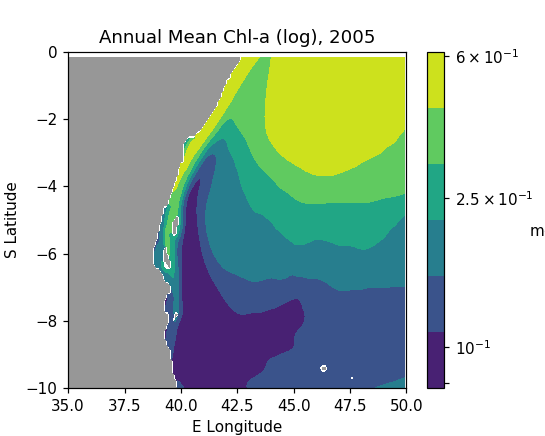

In [67]:
#For Chl-a, also a logaritmic plot

from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
#ticks=[1e-2,1.25e-2,1.5e-2,1.75e-2, 1e-1,1.25e-1,1.5e-1,1.75e-1,2e-1,2.5e-1]
         
low=0.065
high=0.65
ran=0.01

plt.figure(figsize=(5, 4))
plt.plot(111)

#P1 = plt.contourf(lonS,latS,chl_m,locator=ticker.LogLocator(),cmap=plt.cm.spectral)
    #norm= LogNorm())
#lev_exp = np.arange(np.floor(np.log10(np.nanmin(chl_m))-1),
                    #np.ceil(np.log10(np.nanmax(chl_m))+1))
#cbar.ax.set_yticklabels(np.arange(cbar_min, cbar_max+cbar_step, cbar_step), fontsize=16, weight='bold')
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], 
                         #fontsize=16, weight='bold')  
#levs = np.power(10, lev_exp) 
#levs = np.logspace(-1.2,0.3,6)
levs = np.logspace(-1.11,-0.21,7)

P1 = plt.contourf(lonS,latS,chl_m,levs,norm=LogNorm())
plt.contourf(lonS,latS,mask,vmin=0,vmax=2,cmap=plt.cm.Greys)

cbar = plt.colorbar(P1,orientation='vertical',
                    norm=LogNorm(),ticks=[8e-2,1e-1,2.5e-1,6e-1])
#cbar.ax.set_yticklabels(['{:.0e}'.format(x) for x in levs])
                    
#plt.contour(lonS,latS,maskc,colors='k',levels=[0], linewidths=0.5)
#cbar.set_ticks(ticks)
cbar.set_label('mg/m$^3$',rotation=0,labelpad=14)
plt.title('Annual Mean Chl-a (log), 2005')
plt.ylim((-10,0))
plt.xlim((35,50))
plt.xlabel('E Longitude')
plt.ylabel('S Latitude')

In [52]:
log = np.log10(chl_m)
np.nanmin(log)
10**-0.21482
#np.nanmax()

0.6097895815041624

In [35]:
levs

array([ 0.06309573,  0.09261187,  0.13593564,  0.19952623,  0.29286446,
        0.42986623,  0.63095734])

<IPython.core.display.Javascript object>


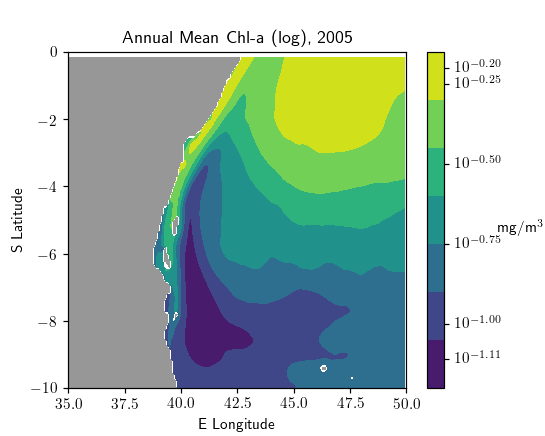

In [104]:
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker

low=0.065
high=0.65
ran=0.01

plt.figure(figsize=(5, 4))
plt.plot(111)
plt.rcParams['text.usetex'] = True
#cbar.ax.set_yticklabels(np.arange(cbar_min, cbar_max+cbar_step, cbar_step), fontsize=16, weight='bold')
#cbar.ax.set_yticklabels(['{:.0f}'.format(x) for x in np.arange(cbar_min, cbar_max+cbar_step, cbar_step)], 
                         #fontsize=16, weight='bold')  
#levs = np.power(10, lev_exp) 
#levs = np.logspace(-1.2,0.3,6)
levs = np.logspace(-1.11,-0.21,8)

P1 = plt.contourf(lonS,latS,log)#levs norm=LogNorm())
plt.contourf(lonS,latS,mask,vmin=0, vmax=2,cmap=plt.cm.Greys)

cbar = plt.colorbar(P1,orientation='vertical',spacing='proportional',
                    norm=LogNorm(),format='$10^{%.2f}$',
                    ticks=[-1.11,-1,-0.75,-0.5,-0.25, -0.2])

#cbar.ax.set_yticklabels(['{:.0e}'.format(x) for x in levs])
#plt.cbar(format=FormatStrFormatter('$10^{%d}$')
#cbar.ax.set_yticklabels(style='sci',scilimits=(-1.11,-0.2))

#cbar.set_ticks(ticks)
cbar.set_label('mg/m$^3$',rotation=0,labelpad=13)
plt.title('Annual Mean Chl-a (log), 2005')
plt.ylim((-10,0))
plt.xlim((35,50))
plt.xlabel('E Longitude')
plt.ylabel('S Latitude')
      

<IPython.core.display.Javascript object>


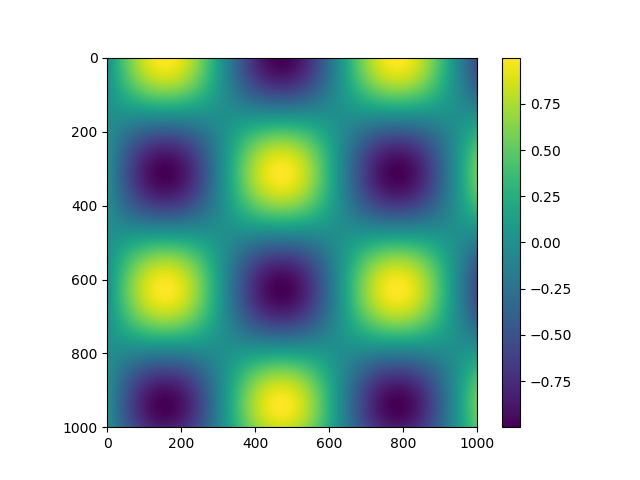

In [185]:
plt.colorbar(format)
fig = plt.figure()
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

In [111]:
fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/domain/mask.nc','r',format='NETCDF4')
tmask = fyd.variables['tmask']
tmask.shape

(1, 75, 3059, 4322)

In [19]:
#Now, for each variable calculate the area-averaged value
#taking into account that the grid is irregular.

fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/domain/mesh_hgr.nc','r',format='NETCDF4')
e1t=fyd.variables['e1t'][0,1373:1493,3865:4045]
e2t=fyd.variables['e2t'][0,1373:1493,3865:4045]    
areas = e1t*e2t

fyd=nc4.Dataset('/group_workspaces/jasmin2/nemo/vol1/ORCA0083-N006/domain/mask.nc','r',format='NETCDF4')
mask = fyd.variables['tmask'][0,0,1373:1493,3865:4045]

m_area=areas*mask
area_tot=np.sum(m_area,dtype=np.float32)

#sst
average_sst = np.nansum(m_area*sst_m)/area_tot
print 'The sst area averaged value for this region in 2005 is:\n',average_sst,'°C'

#sss
average_sss = np.nansum(m_area*sss_m)/area_tot
print 'The sss area averaged value for this region in 2005 is:\n',average_sss,'g/kg'

#din
average_din = np.nansum(m_area*din_m)/area_tot
print 'The DIN area averaged value for this region in 2005 is:\n',average_din,'mmol N/m³'

#chl-a
average_chl = np.nansum(m_area*chl_m)/area_tot
print 'The Chl-a area averaged value for this region in 2005 is:\n',average_chl,'mg/m³'





The sst area averaged value for this region in 2005 is:
27.5086490369 °C
The sss area averaged value for this region in 2005 is:
35.401791626 g/kg
The DIN area averaged value for this region in 2005 is:
0.204391542228 mmol N/m³
The Chl-a area averaged value for this region in 2005 is:
0.261250581259 mg/m³
